## Multiple Linear Regression

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()

In [23]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [27]:
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [28]:
df['Price'] = dataset.target

In [33]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [35]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [44]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

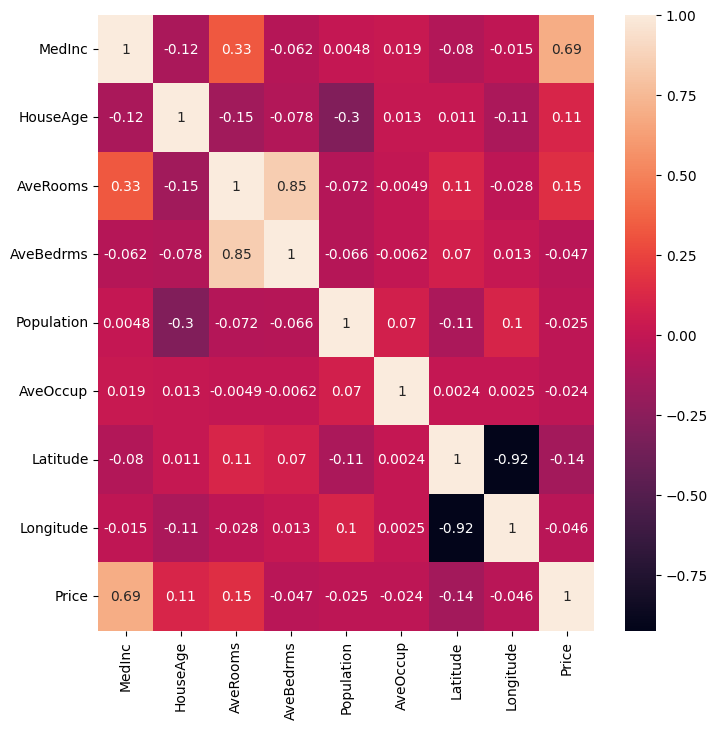

In [45]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True)


In [46]:
# Independent and Dependent features
X = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13828, 8), (6812, 8), (13828,), (6812,))

In [51]:
# Statdardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [64]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [65]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [68]:
print("Slop of Coeffiecient: ", model.coef_)
print("intecept: ", model.intercept_)

Slop of Coeffiecient:  [ 0.84008503  0.11583006 -0.27522645  0.29779239 -0.00906499 -0.02768225
 -0.88357933 -0.86313583]
intecept:  2.0663282108764855


In [69]:
y_pred = model.predict(X_test)

In [70]:
y_pred

array([1.25443655, 2.35595422, 2.04552174, ..., 1.03083228, 2.09303816,
       6.07163054], shape=(6812,))

In [71]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.5339527896574887
0.5364300544135407
0.7307207330146646


In [72]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.6003775721277739


In [73]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5999076354200011

In [77]:
## Prediction For new data
model.predict(scaler.transform(X))

array([4.15626823, 4.00430406, 3.68101775, ..., 0.17818207, 0.32539841,
       0.52417547], shape=(20640,))

In [82]:
dff = pd.DataFrame({
    'Predicted Values': model.predict(scaler.transform(X)),
    'Actual price': y
})
dff.head()

,Predicted Values,Actual price
0,4.156268,4.526
1,4.004304,3.585
2,3.681018,3.521
3,3.249938,3.413
4,2.406965,3.422


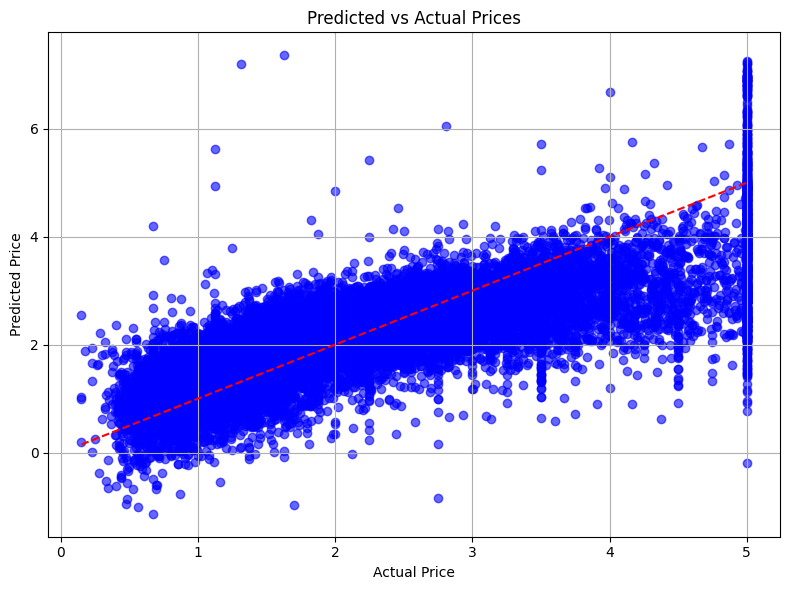

In [92]:
plt.figure(figsize=(8, 6))
plt.scatter(dff['Actual price'], dff['Predicted Values'], alpha=0.6, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Ideal fit line
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [93]:
residuals = y_test-y_pred
residuals

2734    -0.492437
9087    -0.623954
15789   -0.920522
12992   -0.509999
19275   -0.688551
           ...   
10358   -0.124418
1636    -0.005497
9621     0.005168
10567   -1.218038
4229    -1.071621
Name: Price, Length: 6812, dtype: float64

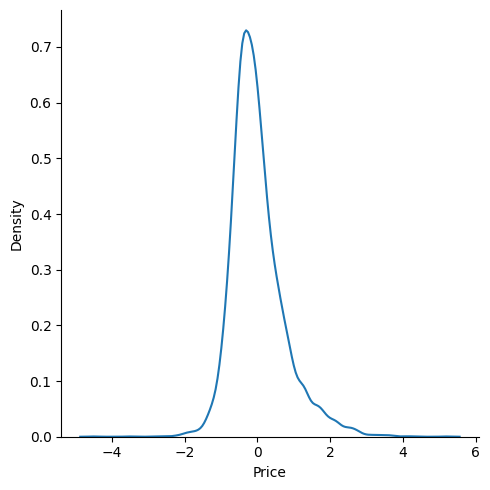

In [95]:
sns.displot(residuals, kind='kde')

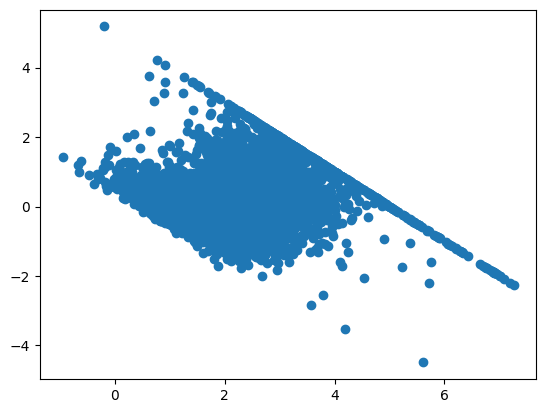

In [96]:
plt.scatter(y_pred, residuals)

In [97]:
# Pickling
import pickle
pickle.dump(model, open('model/multi_reg.pkl','wb'))

In [99]:
multi_res = pickle.load(open('model/multi_reg.pkl','rb'))

In [102]:
multi_res.predict(X_test), model.predict(X_test)

(array([1.25443655, 2.35595422, 2.04552174, ..., 1.03083228, 2.09303816,
        6.07163054], shape=(6812,)),
 array([1.25443655, 2.35595422, 2.04552174, ..., 1.03083228, 2.09303816,
        6.07163054], shape=(6812,)))